# Advanced Merging

In [95]:
import pandas as pd
from pyprojroot import here
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
users = pd.read_csv(here("data/kaggle-data/user_table.csv"))
friends = pd.read_csv(here("data/kaggle-data/friends_table.csv"))
users["id"] = range(1, len(users) + 1)
# let's remove some users from the friends table
friends = friends[friends["Friend 1"] > 10]

## Semi Join
***

Pandas does not directly support the semi (or anti) joins. But they can be emulated. Let's look how to do that for a semi join. Here are the required steps:

1. Merge the 2 tables with an inner join.
2. Search if the left table's key '.isin()' the key of the merged table.
3. Subset the rows of the left table by the boolean series created by '.isin()'.

This returns the rows and columns of the left table only, that have a corresponding ID match in the right table.

In [59]:
users_friends = users.merge(friends, left_on="id", right_on="Friend 1", how="inner")
key_search = users["id"].isin(users_friends["id"])
users[key_search]

,Surname,Name,Age,Subscription Date,id
10,Kirk,Josie,31,1588166811,11
11,Wellington,Sarah,40,1588160408,12
12,Meier,Francine,32,1588161431,13
13,Pomme,Anna,41,1588168125,14
14,Smith,Zoe,26,1588164495,15
...,...,...,...,...,...
995,Kirk,Lee,19,1588160246,996
996,Pomme,Franz,40,1588159625,997
997,Gwahsi,Thomas,40,1588165504,998
998,Beierlorzer,Jean-Luc,32,1588151074,999


## Anti Join
***
This requires the use of the pandas merge `indicator` argument, which allows you to see what side of the join the key was matched.

1. Perform a left join, specifying `indicator=True`
2. Locate the key column of the merged table where the `"_merge"` column is equal to "left_only".
3. Subset the left table where id `.isin()` the "left_only" IDs.

In [60]:
users_friends = users.merge(friends, left_on="id", right_on="Friend 1", how="left", indicator=True)
null_matches = users_friends.loc[users_friends["_merge"] == "left_only", "id"]
users[users["id"].isin(null_matches)]

,Surname,Name,Age,Subscription Date,id
0,Smith,Sarah,30,1588157373,1
1,Picard,Francine,32,1588161732,2
2,Roth,Hans,40,1588157337,3
3,Pomme,Ali,28,1588165636,4
4,Di Lillo,Jordi,42,1588156042,5
5,Roth,Anna,26,1588162689,6
6,Kirk,Jordi,56,1588153009,7
7,Beierlorzer,Josie,20,1588166376,8
8,Picard,Robert,39,1588158173,9
9,Meier,Jean-Luc,37,1588156009,10


## Concatenating Data
***
Pandas `concat` can be used for joining tables in 2 axis, here we will just be exploring how to use it for appending rows of tables together vertically. 

In [85]:
penguins = sns.load_dataset("penguins")
unknown_sex = penguins[penguins["sex"].isnull()]
unknown_sex = unknown_sex.drop("flipper_length_mm", axis=1).copy(deep=True)
males = penguins[penguins["sex"] == "Male"]
females = penguins[penguins["sex"] == "Female"] 

In [86]:
# axis is by default 0, the order of the tables is relevant
pd.concat([unknown_sex, females, males], axis=0)

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex,flipper_length_mm
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,3475.0,NaN,NaN
9,Adelie,Torgersen,42.0,20.2,4250.0,NaN,NaN
10,Adelie,Torgersen,37.8,17.1,3300.0,NaN,NaN
11,Adelie,Torgersen,37.8,17.3,3700.0,NaN,NaN
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,5500.0,Male,230.0
335,Gentoo,Biscoe,55.1,16.0,5850.0,Male,230.0
337,Gentoo,Biscoe,48.8,16.2,6000.0,Male,222.0
341,Gentoo,Biscoe,50.4,15.7,5750.0,Male,222.0


In [88]:
# Use sort to order the columns alphabatically
pd.concat([unknown_sex, females, males], sort=True)

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,species
3,NaN,NaN,NaN,NaN,Torgersen,NaN,Adelie
8,18.1,34.1,3475.0,NaN,Torgersen,NaN,Adelie
9,20.2,42.0,4250.0,NaN,Torgersen,NaN,Adelie
10,17.1,37.8,3300.0,NaN,Torgersen,NaN,Adelie
11,17.3,37.8,3700.0,NaN,Torgersen,NaN,Adelie
...,...,...,...,...,...,...,...
333,16.3,51.5,5500.0,230.0,Biscoe,Male,Gentoo
335,16.0,55.1,5850.0,230.0,Biscoe,Male,Gentoo
337,16.2,48.8,6000.0,222.0,Biscoe,Male,Gentoo
341,15.7,50.4,5750.0,222.0,Biscoe,Male,Gentoo


In [89]:
# setting `join = "inner"` ensures only common columns are returned
pd.concat([unknown_sex, females, males], join="inner")

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,3700.0,NaN
...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,5500.0,Male
335,Gentoo,Biscoe,55.1,16.0,5850.0,Male
337,Gentoo,Biscoe,48.8,16.2,6000.0,Male
341,Gentoo,Biscoe,50.4,15.7,5750.0,Male


In [90]:
# you can specify an index key when performing the concat, which is useful for summarising
penguins_concat = pd.concat([unknown_sex, females, males], keys=["unknown", "female", "male"])
penguins_concat

species     island  bill_length_mm  bill_depth_mm  body_mass_g  \
unknown 3    Adelie  Torgersen             NaN            NaN          NaN   
        8    Adelie  Torgersen            34.1           18.1       3475.0   
        9    Adelie  Torgersen            42.0           20.2       4250.0   
        10   Adelie  Torgersen            37.8           17.1       3300.0   
        11   Adelie  Torgersen            37.8           17.3       3700.0   
...             ...        ...             ...            ...          ...   
male    333  Gentoo     Biscoe            51.5           16.3       5500.0   
        335  Gentoo     Biscoe            55.1           16.0       5850.0   
        337  Gentoo     Biscoe            48.8           16.2       6000.0   
        341  Gentoo     Biscoe            50.4           15.7       5750.0   
        343  Gentoo     Biscoe            49.9           16.1       5400.0   

              sex  flipper_length_mm  
unknown 3     NaN                NaN  
        8     NaN                NaN  
        9     NaN                NaN  
        10    NaN                NaN  
        11    NaN                NaN  
...           ...                ...  
male    333  Male              230.0  
        335  Male              230.0  
        337  Male              222.0  
        341  Male              222.0  
        343  Male              213.0  

[344 rows x 7 columns]

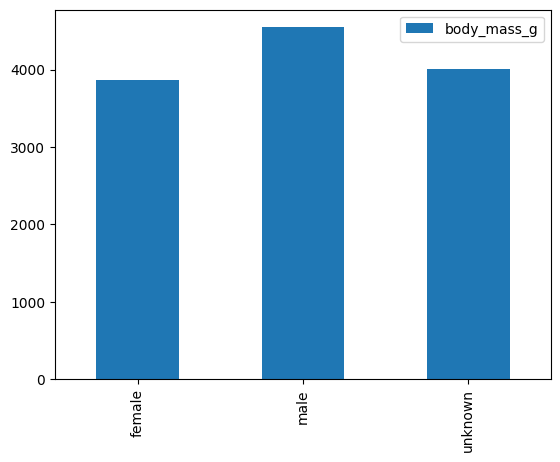

In [96]:
penguins_concat.groupby(level=0).agg({"body_mass_g":"mean"}).plot(kind="bar")
plt.show()